### Investigate number_of_learners > 40 outliers

#### Problem:
number_of_learners is normally distributed with a large number
of outliers over 40

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
dfFlt = load_df('dfFlt')
dfRaw = load_df('dfRaw')

#### Display histogram

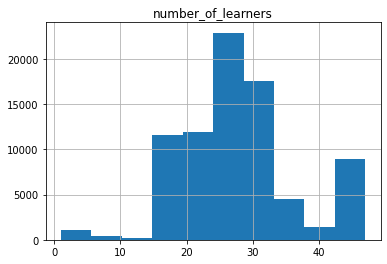

In [3]:
out = dfFlt.select('number_of_learners').toPandas().hist()

- Just under 10,000 over 40 learners
- Normally distributed

#### Compare Full vs Filtered Dataset
- Is the difference from filtering by Fully Scored?
- Filtered dataset is only "Fully Scored" observations

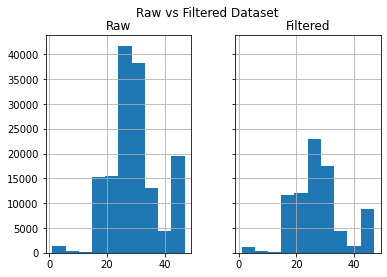

In [4]:
dual_hist(
    dfRaw.select('number_of_learners').toPandas(),
    dfFlt.select('number_of_learners').toPandas(),
    title1='Raw',
    title2='Filtered',
    main='Raw vs Filtered Dataset'
)

- No Difference
- Not from filtering

#### Filtered Calculated
- Add recalculation the number_of_learners

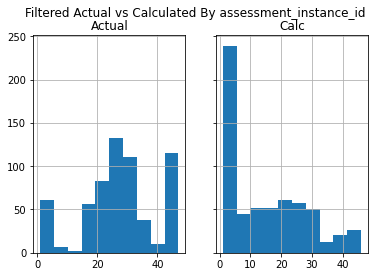

In [5]:
# Calculate number of learners on Filtered
dfCount = dfFlt.groupBy('assessment_instance_id', 'number_of_learners').agg(
F.countDistinct('learner_id').alias('number_of_learners_calc')
)

dfPd = dfCount.toPandas()


dual_hist(
    dfPd['number_of_learners'],
    dfPd['number_of_learners_calc'],
    title1='Actual',
    title2='Calc',
    main='Filtered Actual vs Calculated By assessment_instance_id'
)

- Significantly Different
- Calculated
  - Normal distribution with outliers
    - Outliers at 1 to 5 and 40
  - Or, Skewed Right Normal distribution

In [6]:
add_todo("Impute number_of_learners with calculated values")
finish_todo('Investigate number_of_learners > 40 outliers')